In [ ]:
import pandas as pd

# Load titanic dataset
df = pd.read_csv("data/titanic.csv")


# show missing values
print("\nMissing values per column:") 
print(df.isnull().sum())

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Save cleaned csv
df.to_csv("data/cleaned_data.csv", index=False)

# Confirmation
print("\nCleaning done!")
print("Missing values:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())
print("Shape:", df.shape)



Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cleaning done!
Missing values: 687
Duplicates: 0
Shape: (891, 12)


/var/folders/h_/fz6dpfz90t73s_lz7wf4ts_00000gn/T/ipykernel_28178/1615464759.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/h_/fz6dpfz90t73s_lz7wf4ts_00000gn/T/ipykernel_28178/1615464759.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

### Task 2: Exploratory Data Analysis (EDA)

 In this section, we analyze the cleaned Titanic dataset using summary statistics and visualizations.

Summary statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


/var/folders/h_/fz6dpfz90t73s_lz7wf4ts_00000gn/T/ipykernel_28178/1093545261.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


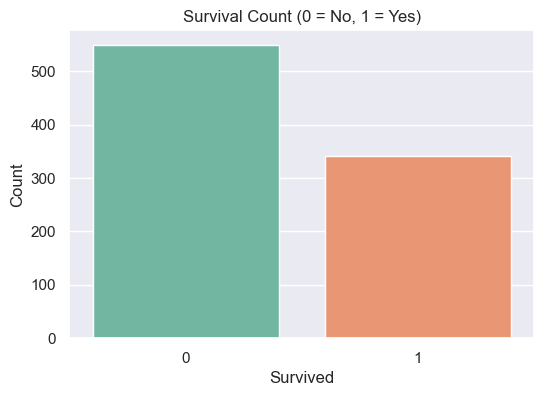

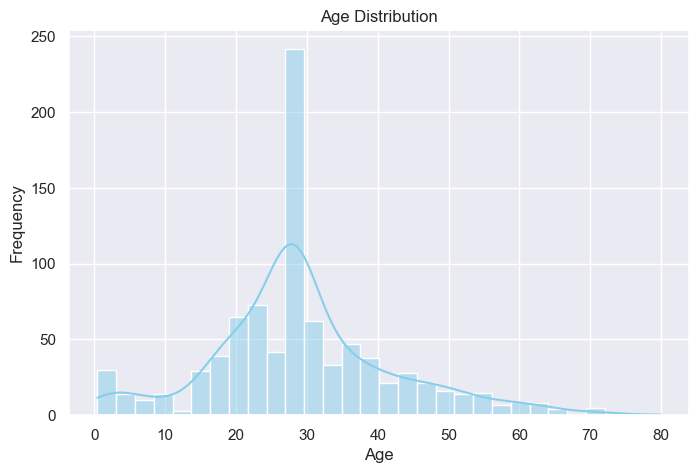

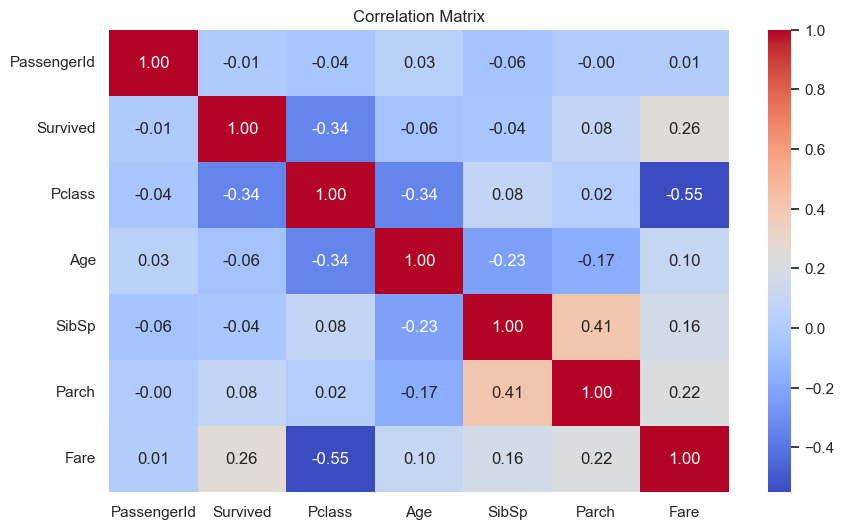

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("data/cleaned_data.csv")

# Set style for seaborn
sns.set_theme(style="darkgrid")

# 1. Summary statistics
print("Summary statistics:")
display(df.describe(include='all'))

# Visualization 1: Survival Count (Bar Plot)
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# Visualization 2: Age Distribution (Histogram)
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Visualization 3: Heatmap of Correlations
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [34]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Data Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 25917.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Task 3: ML Model – Titanic Dataset

In [36]:
# 1. Import Required Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load Cleaned Data
df = pd.read_csv("data/cleaned_data.csv")
df.head()

# 3. Preprocess Data

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop non-numeric or unhelpful columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# Drop rows with remaining NaNs if any
df = df.dropna()


# 4. Split Data into Features and Labels

# Features (X) and target (y)
X = df.drop(columns=['Survived'])
print("Model expects:", X.columns.tolist())
y = df['Survived']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Train the Model

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# 6. Make Predictions and Evaluate

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Model expects: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
✅ Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
[[92 13]
 [18 56]]


### Task 4: Create a UI – Streamlit Option

- We’ll build a simple Streamlit UI to:

- Take user input (e.g., Age, Sex, Pclass, etc.)

- Use your trained model to predict survival

- Show the prediction result on the page

In [38]:
import joblib

# Save the model
joblib.dump(model, "titanic_model.pkl")

# Also save the column order for input
joblib.dump(X.columns.tolist(), "model_columns.pkl")


['model_columns.pkl']